In [5]:
from analysis.get_dataframe_from_results import get_pandas_dataset, retrieve_information_from_dataset_mod
from analysis.dataset_graphs import plot_graphs_of_dataset_loc
from analysis.get_tables_results import create_table_cleaned
from analysis.get_results import bar_chart_fix_position_cleaned
from analysis.get_results import sucess_vs_position_cleaned

import utils.global_variables as gl
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [6]:
DATASET_DIR = gl.DAFNY_ASSERTION_DATASET
dataset_df = pd.DataFrame(retrieve_information_from_dataset_mod(DATASET_DIR))
print("Number of test cases per benchmark")
dataset_df.groupby("benchmark").size()

Number of test cases per benchmark


benchmark
w/o-1      236
w/o-2      184
w/o-all     28
dtype: int64

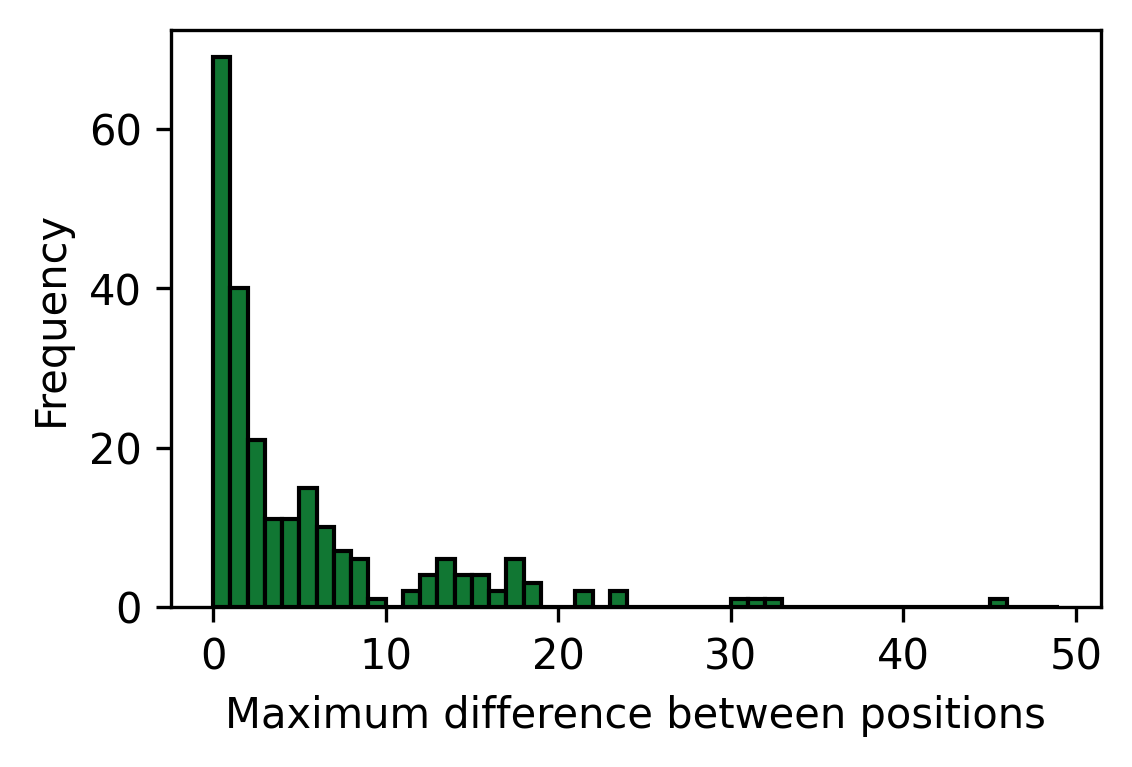

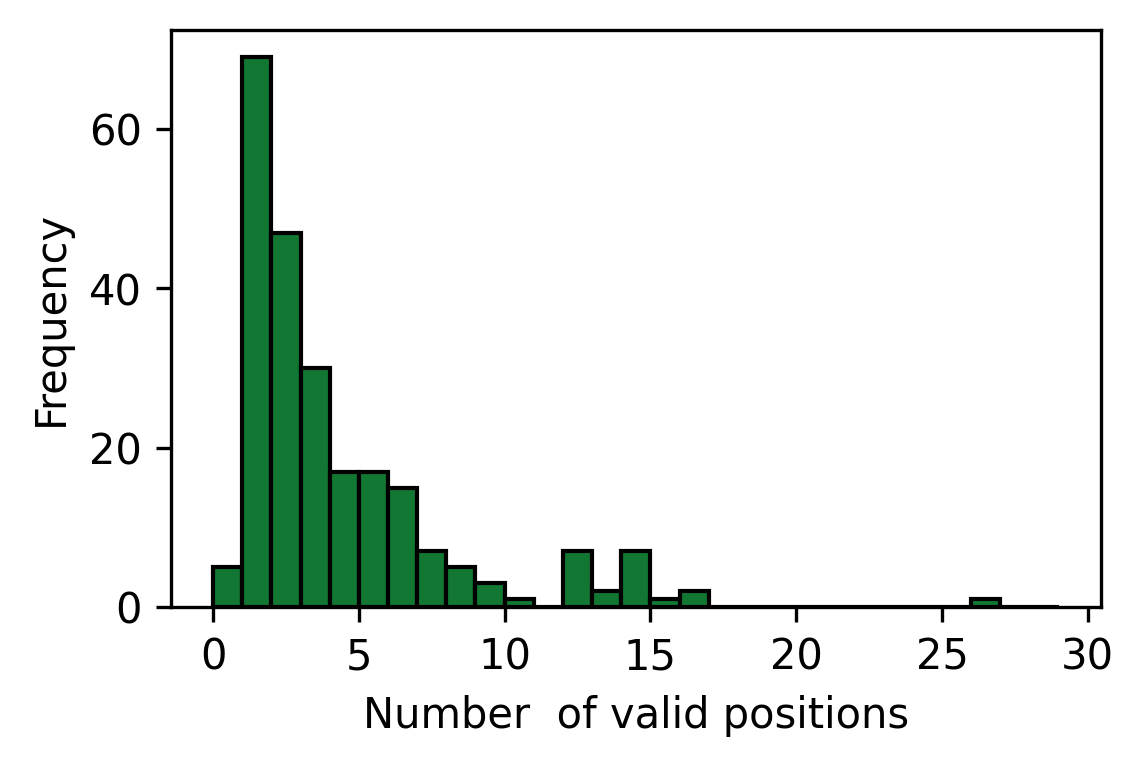

In [7]:
plot_graphs_of_dataset_loc(dataset_df, gl.BASE_PATH / "images")

In [8]:
def classify(row, laurel_col_name):
    laurel = row[laurel_col_name]
    syntactic = row["all_syntatic_valid_lines"]
    oracle = row["all_lines_where_oracle_fixes_file"]

    if not laurel or laurel == []:
        return "NO POS"
    
    laurel_val = laurel[0]
    if laurel_val not in syntactic:
        return "INVALID"
    elif oracle and laurel_val in oracle[0]:
        return "VALID"
    else:
        return "PARTIAL"
    

dataset_df["laurel_pos_classification"] = dataset_df.apply(
    classify, axis=1, args=("laurel_pos",)
)

dataset_df["laurel_better_pos_classification"] = dataset_df.apply(
    classify, axis=1, args=("laurel_better_pos",)
)

In [5]:
dataset_1_df = dataset_df[dataset_df["benchmark"] == "w/o-1"]
print(dataset_1_df.groupby("laurel_pos_classification").size().reset_index(name="count"))
print(dataset_1_df.groupby("laurel_better_pos_classification").size().reset_index(name="count"))

  laurel_pos_classification  count
0                   INVALID      2
1                    NO POS     46
2                   PARTIAL     34
3                     VALID    154
  laurel_better_pos_classification  count
0                           NO POS     16
1                          PARTIAL     50
2                            VALID    170
